# Introduction

In epidemiology and public health, fever is a key sign in many infectious diseases. Several of the following flares had occurred recently in the world: SARS in 2003, H1N1 influenza in 2009, Ebola in 2014 and the ongoing COVID-19 pandemic. Although the sole identification and observation of fever are insufficient not to spread such diseases, they are indeed necessary components of many of the epidemic’s riskadjustment methods. Given their regularity and high level of rectal fever mean truth, traditional fever detecting methods used in clinical practice emissary oral temperature measurement are a golden standard . Traditional methods of core temperature; notwithstanding, they can be impractical for large-scale experimentation.

In response to these concerns, non-contact infrared thermometers have grown in popularity, especially for mass temperature screening in public and high-traffic areas. By measuring skin temperature, the units offer a faster and less intrusive approach to “feeling the fever,” generally from the forehead. Skin temperature is extremely unstable and does not adequately represent an individual’s core temperature since it can be greatly influenced by environmental and other variables. Particularly efforts that can maximize the efficacy of mass fever screening in terms of additional procedures that may accurately predict mouth temperature from non-contact infrared scans.

The objective is to train and optimise the optimal model to categorise oral temperatures that are 37.5C or above utilising features of environment information and thermal image readings from:

1. Fast mode oral temperature measurement (aveOralF)
2. Monitor mode oral temperature reading (aveOralM)


The model has two task which,
* Regression: calculate exact oral temperature values (in continuous)
* Classification: categorize fever patients(binary classification) based on predicted with actual temperatures.

Our model predicts two targets as it will be helpful in real-world situations where ongoing observation is required.

We will use these measures to assess our models.

1. Regression: Mean-squared error(MSE), r2 score
2. Classification: Accuracy, Average of Precision, Recall, F1-score, and AUC-ROC.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.tree import DecisionTreeRegressor

In [6]:
!pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo

infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# metadata
print(infrared_thermography_temperature.metadata)

# variable information
print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

# Data Exploration and Preprocessing:
- Analyze data statistics (X.describe(), X.info())
- Visualize distributions (piechart, barchart, histograms, heatmap)

In [8]:
X.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

The chart below indicates that 40.6% of the dataset is made up of men, while 59.4% of the dataset is made up of women.

Female    606
Male      414
Name: Gender, dtype: int64


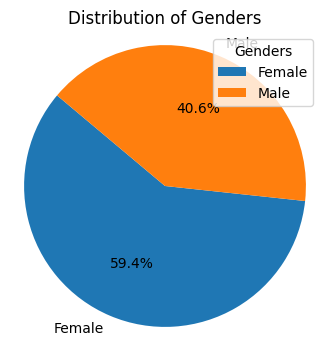

In [10]:
import matplotlib.pyplot as plt

# Calculate the value counts for the 'Gender' column
gender_counts = X["Gender"].value_counts()

print(gender_counts)

plt.figure(figsize=[4,4])
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genders')
plt.axis('equal')
plt.legend(title="Genders", loc="best")
plt.show()

The age distribution of the people in a dataset is represented visually by a bar chart, which primarily focuses on younger people, particularly those in the 18–20 and 21–25 age categories.

18-20    534
21-25    355
26-30     67
31-40     31
51-60     11
21-30     10
41-50      9
>60        3
Name: Age, dtype: int64


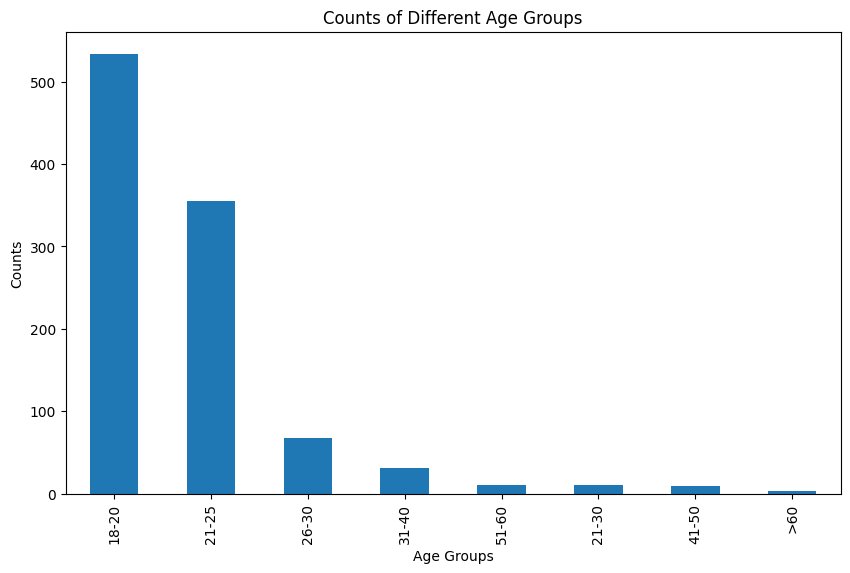

In [11]:
import matplotlib.pyplot as plt

# Calculate the value counts for the 'Age' column
age_counts = X["Age"].value_counts()

print(age_counts)

plt.figure(figsize=[10,6])
age_counts.plot(kind='bar')
plt.title('Counts of Different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Counts')
plt.show()

The information reveals a notable disparity in the proportion of ethnic groups, with White people making up the majority, followed by Asian and Black or African-American people.

In [12]:
X["Ethnicity"].value_counts()

White                                506
Asian                                260
Black or African-American            143
Hispanic/Latino                       57
Multiracial                           50
American Indian or Alaskan Native      4
Name: Ethnicity, dtype: int64

In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aveOralF  1020 non-null   float64
 1   aveOralM  1020 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


Use concat() to combine two tables X and Y together to generate a  heatmap

In [14]:
import pandas as pd

data = pd.concat([X, y], axis=1)

print(data)

      Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0       Male  41-50                      White   24.0      28.0       0.8   
1     Female  31-40  Black or African-American   24.0      26.0       0.8   
2     Female  21-30                      White   24.0      26.0       0.8   
3     Female  21-30  Black or African-American   24.0      27.0       0.8   
4       Male  18-20                      White   24.0      27.0       0.8   
...      ...    ...                        ...    ...       ...       ...   
1015  Female  21-25                      Asian   25.7      50.8       0.6   
1016  Female  21-25                      White   25.7      50.8       0.6   
1017  Female  18-20  Black or African-American   28.0      24.3       0.6   
1018    Male  26-30            Hispanic/Latino   25.0      39.8       0.6   
1019  Female  18-20                      White   23.8      45.6       0.6   

      T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHLC1  T_FHBC1  

The correlation matrix shown below shows the darker in color the higher the correlation between the two variables.

There is high correlation on the measurement features of canthus region and mouth region with our target aveOralF and aveOralM.
Whereas the measurement features of forehead region has less correlation significance to the targets, but we will still consider to use it in training.
T_atm,Humidity,Distance,T_offset1 has less relation with the target which in between 0.10-0.14

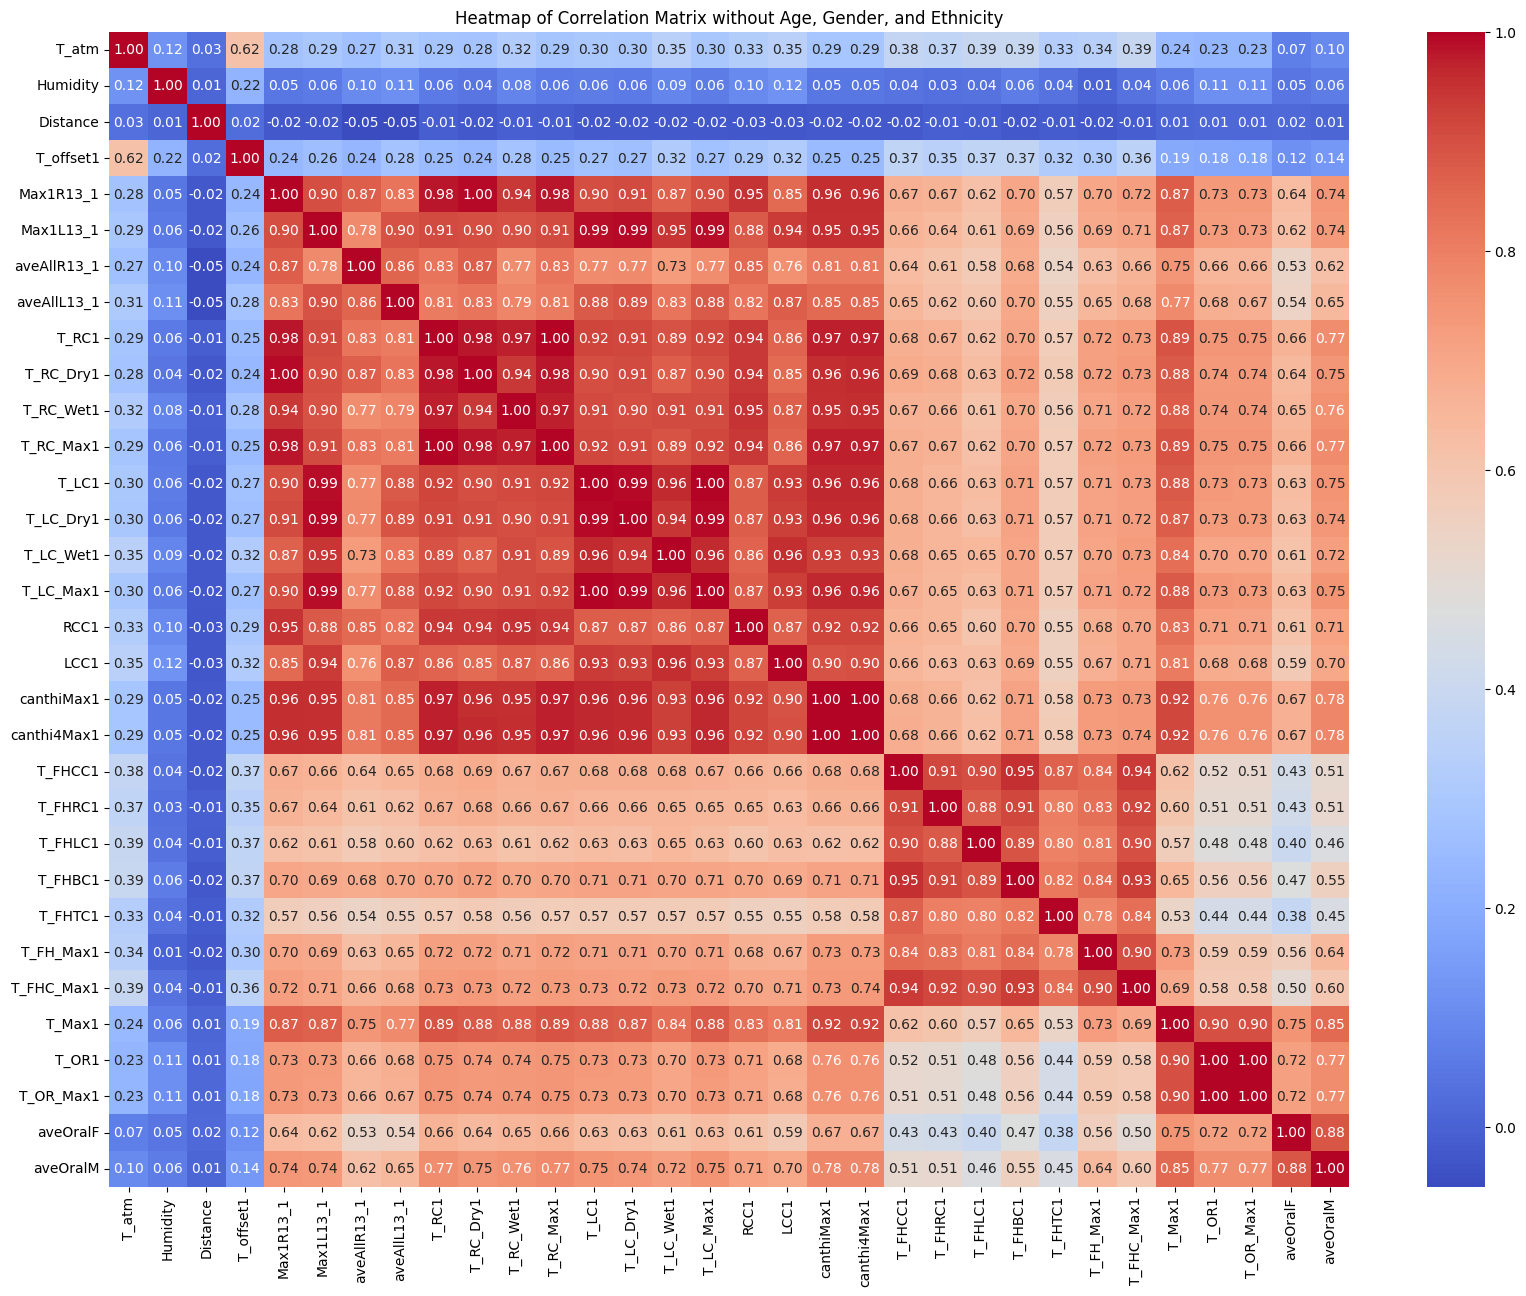

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'Age', 'Gender', and 'Ethnicity' columns
data_dropped = data.drop(columns=['Age', 'Gender', 'Ethnicity'])

# Calculate the correlation matrix for the DataFrame without the dropped columns
corr = data_dropped.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix without Age, Gender, and Ethnicity')
plt.show()

The histogram plotted graph shows it is generally balanced beside T_atm, humidity and distance features

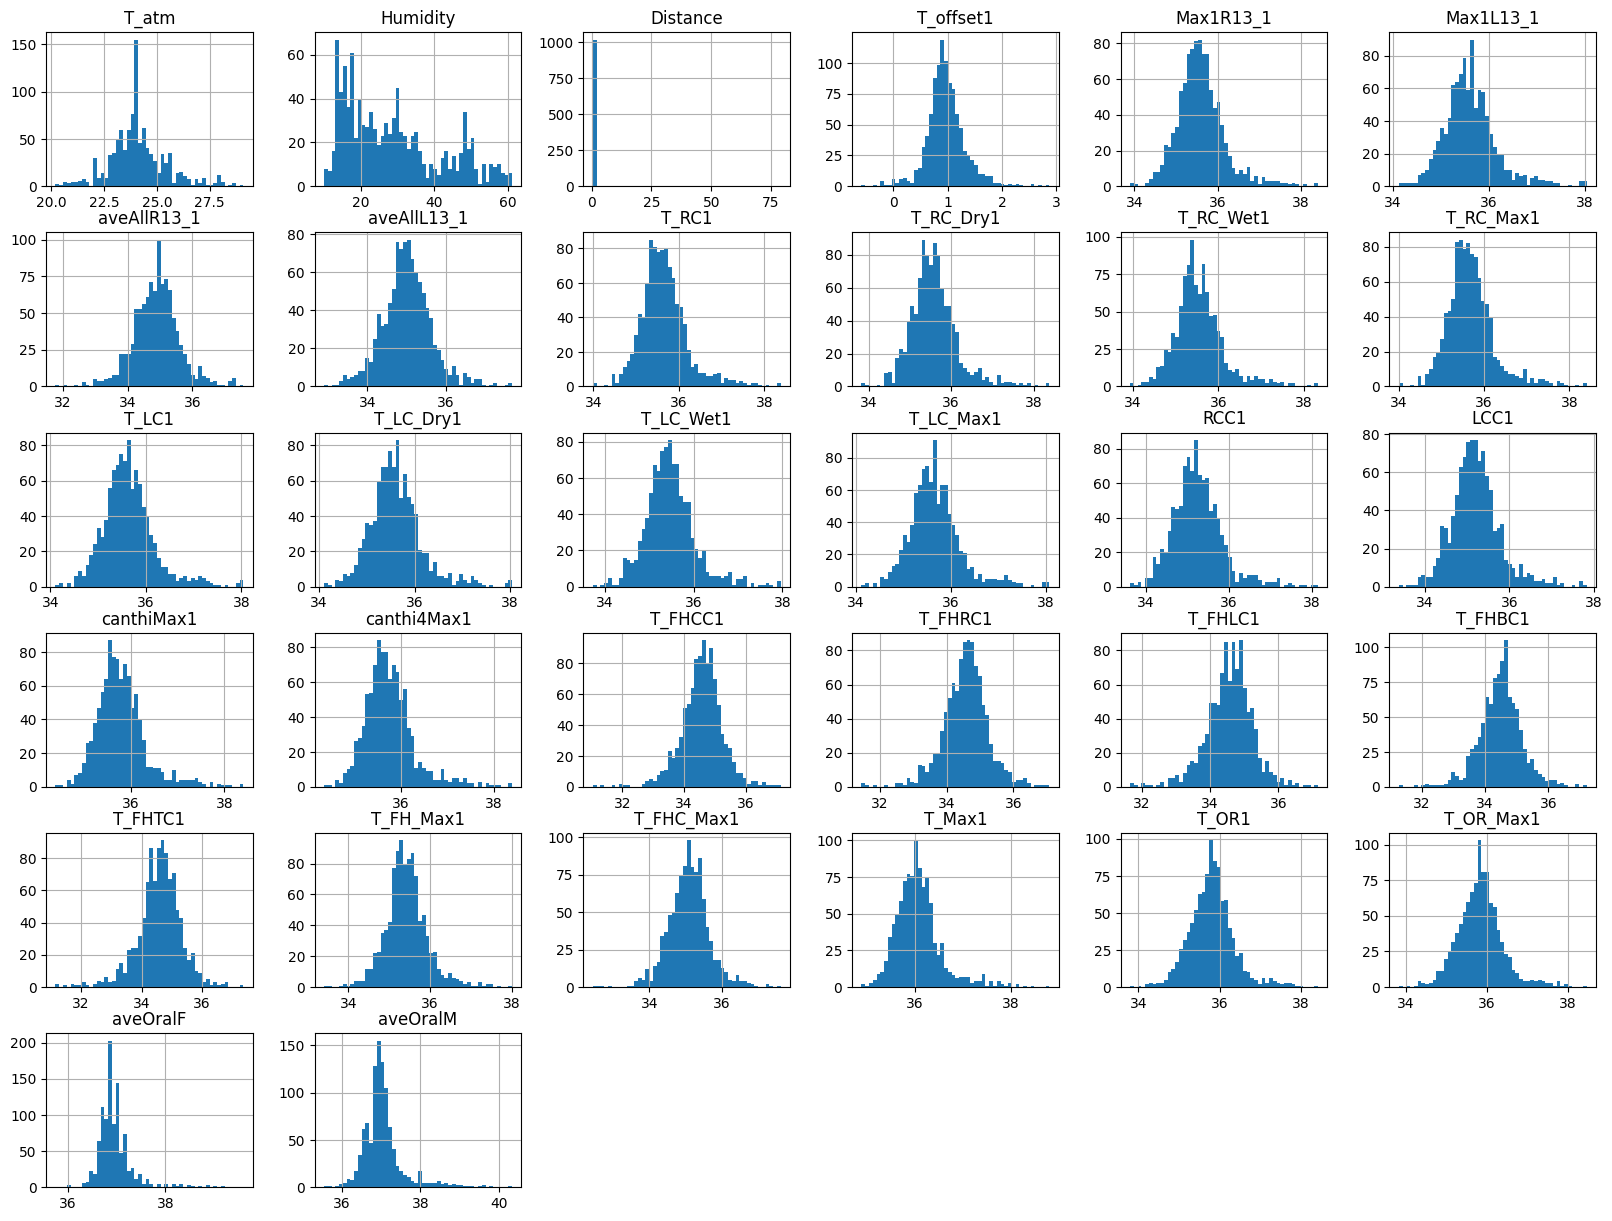

In [16]:
data.hist(bins=50, figsize=(20,15))
plt.show()

The plot displays the bulk of the predicted values for aveOralF and aveOralM, which are close to the average body temperature.Thus, it is safe to proceed with the data.


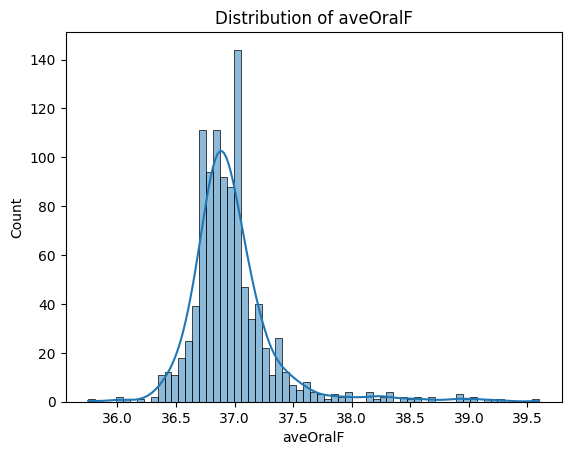

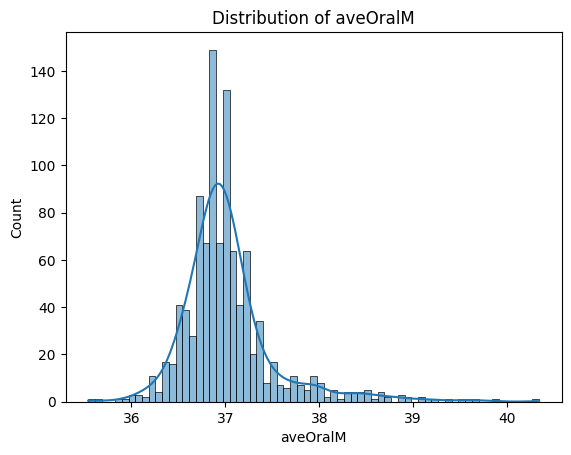

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['aveOralF'], kde=True)
plt.title('Distribution of aveOralF')
plt.show()

sns.histplot(data['aveOralM'], kde=True)
plt.title('Distribution of aveOralM')
plt.show()

# Data Cleaning/Treating missing values

We are able to identify 2 missing values in the distance attribute, despite the dataset in the UCCL repository stating that there are no missing values.To address the missing values present in the dataset, the missing values in column 'Distance' of the DataFrame will be replaced with the mean value of the existing values in the same column.
- Check for missing values (X.isnull().sum()) and handle them (imputation, removal)

In [18]:
print("Missing values:",X.isnull().sum())

Missing values: Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64


In [19]:
# Calculate the mean of non-missing values
mean_distance = X['Distance'].mean()

# Replace missing values with the mean
X['Distance'].fillna(mean_distance, inplace=True)

<ipython-input-19-0971c64eb827>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Distance'].fillna(mean_distance, inplace=True)


In [64]:
print("Missing values:",X.isnull().sum())

Missing values: Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64


#Handling Categorical Attributes
Using the OneHotEncoder class from the sklearn.preprocessing, the categorical features (column 'Gender, 'Age', 'Ethnicity') in X are encoded.To help the model comprehend and utilise the data more effectively, it adds a new binary (0 or 1) column for every distinct category in a feature.





In [20]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

columns_to_encode = ['Gender', 'Age', 'Ethnicity']

# Instantiate the encoder
encoder = OneHotEncoder(drop='first', dtype=int)

# Fit and transform the data, and convert it to a DataFrame
encoded_data = encoder.fit_transform(X[columns_to_encode])


columns = []
for i, category in enumerate(encoder.categories_):
    columns.extend([f"{columns_to_encode[i]}_{cat}" for cat in category[1:]])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=columns, index=X.index)

# Drop the original columns from df and concatenate the new encoded_df
df_final = pd.concat([X.drop(columns=columns_to_encode), encoded_df], axis=1)

print(df_final)

      T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  \
0      24.0      28.0       0.8     0.7025    35.0300    35.3775      34.4000   
1      24.0      26.0       0.8     0.7800    34.5500    34.5200      33.9300   
2      24.0      26.0       0.8     0.8625    35.6525    35.5175      34.2775   
3      24.0      27.0       0.8     0.9300    35.2225    35.6125      34.3850   
4      24.0      27.0       0.8     0.8950    35.5450    35.6650      34.9100   
...     ...       ...       ...        ...        ...        ...          ...   
1015   25.7      50.8       0.6     1.2225    35.6425    35.6525      34.8575   
1016   25.7      50.8       0.6     1.4675    35.9825    35.7575      35.4275   
1017   28.0      24.3       0.6     0.1300    36.4075    36.3400      35.8700   
1018   25.0      39.8       0.6     1.2450    35.8150    35.5250      34.2950   
1019   23.8      45.6       0.6     0.8675    35.7075    35.5825      34.8875   

      aveAllL13_1    T_RC1 

In [21]:
df_final.shape

(1020, 43)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

multi_output_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100))

multi_output_regressor.fit(df_final, y)

MultiOutputRegressor(estimator=RandomForestRegressor())

In [68]:
feature_importances_aveOralF = multi_output_regressor.estimators_[0].feature_importances_
feature_importances_aveOralM = multi_output_regressor.estimators_[1].feature_importances_

feature_importance_df_aveOralF = pd.DataFrame({'Feature' : df_final.columns, 'Importance': feature_importances_aveOralF})
feature_importance_df_aveOralM = pd.DataFrame({'Feature' : df_final.columns, 'Importance': feature_importances_aveOralM})

feature_importance_df_aveOralF = feature_importance_df_aveOralF.sort_values(by='Importance', ascending=False)
feature_importance_df_aveOralM = feature_importance_df_aveOralM.sort_values(by='Importance', ascending=False)



The visualizations clearly illustrate the varying degrees of importance that different features hold in predicting the model's target variables. The features "T_On_Max1", "T_Max1", and "T_On_Max2" are the most important in predicting outcomes, according to the feature significance chart for the model "aveOralF", indicating a significant dependence on operational or environmental factors. The "aveOralM" feature significance chart clearly illustrates how important a single feature is in influencing the model's predictions—it outweighs all other factors by a significant margin. This shows that one particular factor greatly influences the model's results, whereas other features—like demographics—have very little bearing.



<ipython-input-69-50ced7092b5b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(feature_importance_df_aveOralF['Feature'], rotation=90, ha='right')
<ipython-input-69-50ced7092b5b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(feature_importance_df_aveOralM['Feature'], rotation=90, ha='right')


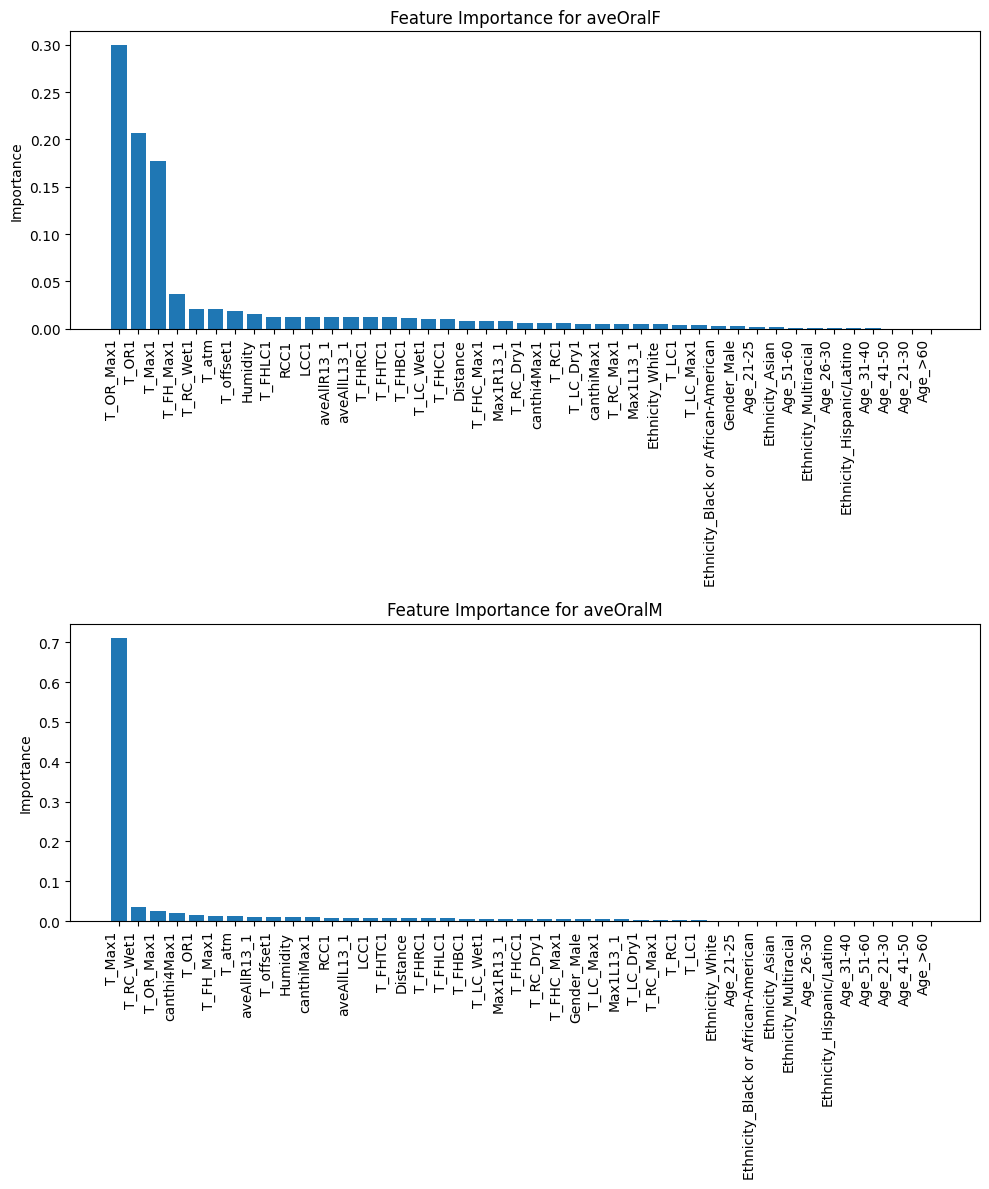

In [69]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,12))

axes[0].bar(feature_importance_df_aveOralF['Feature'], feature_importance_df_aveOralF['Importance'])
axes[0].set_xticklabels(feature_importance_df_aveOralF['Feature'], rotation=90, ha='right')
axes[0].set_title('Feature Importance for aveOralF')
axes[0].set_ylabel('Importance')

axes[1].bar(feature_importance_df_aveOralM['Feature'], feature_importance_df_aveOralM['Importance'])
axes[1].set_xticklabels(feature_importance_df_aveOralM['Feature'], rotation=90, ha='right')
axes[1].set_title('Feature Importance for aveOralM')
axes[1].set_ylabel('Importance')

plt.tight_layout()
plt.show()

# Specify the desired variables:

For the regression tasks, create distinct DataFrames and include the corresponding oral temperature goal (e.g., df_reg["target"] = df["aveOralF"]).
Define fever thresholds (e.g., df_class["fever_F"] = (df["aveOralF"] >= 37.5) for classification purposes.repeating for aveOralM after astype(int)).

In [23]:
y1 = y['aveOralF']
y2 = y['aveOralM']
# Targets for classification (fever detection from aveOralF)
y_f = (y['aveOralF'] >= 37.5).astype(int)
# Targets for classification (fever detection from aveOralM)
y_m = (y['aveOralM'] >= 37.5).astype(int)


## **Divide Data into Sets for Testing and Training:** ##

Use train_test_split to create unique sets (e.g., 80% training, 20% testing).

Ensuring that every training and testing batch of data maintains a distribution similar to the source dataset is vital. I'll evaluate random and stratified splitting methods in order to accomplish this, then compare the results to the intended dataset proportions.



In [71]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y_f_train, y_f_test, y_m_train, y_m_test = train_test_split(df_final, y1, y2, y_f, y_m, test_size=0.2, random_state=42)

## **Model Training and Evaluation** ##
Cross validation will be performed on all the models beside linear regressio to find the best model using training data.

We will use GridSearchCV (searches through all combinations of hyperparameters) for less computation intensive models and Randomized SearchCV (for model with multiple parameter)which is more effective for the process of hyperparameter tuning. They help in find the optimal configuration for a model and ensure model generalizes to unseen data.
- Linear regression

- GridSearchCV: KNN, Decision Tree, Ridge Regression, Lasso regresion,Elastic Net, Random Forest

- RandomizedSearchCV: Random Forest




#Linear Regression
Training the linear regression model:
Evaluating linear regression within a supervised learning framework using training data.

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


# For the aveOralF target variable
linear_regression_1 = LinearRegression()
linear_regression_1.fit(X_train, y1_train)
predictions_1 = linear_regression_1.predict(X_test)
mse_1 = mean_squared_error(y1_test, predictions_1)
r_squared_1 = linear_regression_1.score(X_test, y1_test)
print(f"Linear regression Mean Squared Error for Target aveOralF: {mse_1:.4f}")
print(f"Linear regression R-squared for Target aveOralF: {r_squared_1:.4f}")
print("-" * 80)

# For the aveOralM target variable
linear_regression_2 = LinearRegression()
linear_regression_2.fit(X_train, y2_train)
predictions_2 = linear_regression_2.predict(X_test)
mse_2 = mean_squared_error(y2_test, predictions_2)
r_squared_2 = linear_regression_2.score(X_test, y2_test)
print(f"Linear regression Mean Squared Error for Target aveOralM: {mse_2:.4f}")
print(f"Linear regression R-squared for Target aveOralM: {r_squared_2:.4f}")

Linear regression Mean Squared Error for Target aveOralF: 0.0572
Linear regression R-squared for Target aveOralF: 0.5243
--------------------------------------------------------------------------------
Linear regression Mean Squared Error for Target aveOralM: 0.0540
Linear regression R-squared for Target aveOralM: 0.7433


#Ridge Regression
Next, GridSearchCV will be employed to tune the regularization parameter (alpha) for the Polynomial model. The optimal hyperparameters, corresponding mean squared error score and  R-squared are outputted.

In [73]:

models = {
'Ridge Regression': {
        'model': Ridge(),
        'param_grid': {'alpha': [0.1, 1, 10]}
    },
}

for model_name, model_info in models.items():
    for i in range(2):
        y_train = [y1_train, y2_train][i]
        y_test = [y1_test, y2_test][i]

        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5)

        # Fit the GridSearchCV object to find best hyperparameters
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Make predictions on the test set
        predictions = best_model.predict(X_test)

        # Evaluate
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {i+1}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tMean Squared Error (MSE): {mse:.4f}")
        print(f"\tR-squared (R²): {r2:.4f}")
        print("-" * 30)

Ridge Regression Performance for Target Variable 1:
	Best Params: {'alpha': 10}
	Mean Squared Error (MSE): 0.0548
	R-squared (R²): 0.5447
------------------------------
Ridge Regression Performance for Target Variable 2:
	Best Params: {'alpha': 10}
	Mean Squared Error (MSE): 0.0517
	R-squared (R²): 0.7543
------------------------------


#Lasso Regression

Next, GridSearchCV will be employed to tune the regularization parameter (alpha) for the Lasso model. The optimal hyperparameters, corresponding mean squared error score and  R-squared are outputted.

In [74]:

models = {
 'Lasso Regression': {
        'model': Lasso(),
        'param_grid': {'alpha': [0.01, 0.1, 1]}
    },
}

for model_name, model_info in models.items():
    for i in range(2):
        y_train = [y1_train, y2_train][i]
        y_test = [y1_test, y2_test][i]

        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5)

        # Fit the GridSearchCV object to find best hyperparameters
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Make predictions on the test set
        predictions = best_model.predict(X_test)

        # Evaluate
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {i+1}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tMean Squared Error (MSE): {mse:.4f}")
        print(f"\tR-squared (R²): {r2:.4f}")
        print("-" * 30)

Lasso Regression Performance for Target Variable 1:
	Best Params: {'alpha': 0.01}
	Mean Squared Error (MSE): 0.0533
	R-squared (R²): 0.5573
------------------------------
Lasso Regression Performance for Target Variable 2:
	Best Params: {'alpha': 0.01}
	Mean Squared Error (MSE): 0.0525
	R-squared (R²): 0.7509
------------------------------


#Decision Trees

Next, GridSearchCV will be employed to tune the regularization parameter (alpha) for the Decision Trees. The optimal hyperparameters, corresponding mean squared error score and  R-squared are outputted.

In [75]:
from sklearn.tree import DecisionTreeRegressor

models = {
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'param_grid': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    }
}

for model_name, model_info in models.items():
    for i in range(2):
        y_train = [y1_train, y2_train][i]
        y_test = [y1_test, y2_test][i]

        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='neg_mean_squared_error')

        # Fit the GridSearchCV object to find the best hyperparameters
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Make predictions on the test set
        predictions = best_model.predict(X_test)

        # Evaluate
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {i+1}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tMean Squared Error (MSE): {mse:.4f}")
        print(f"\tR-squared (R²): {r2:.4f}")
        print("-" * 30)


Decision Tree Performance for Target Variable 1:
	Best Params: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
	Mean Squared Error (MSE): 0.0616
	R-squared (R²): 0.4884
------------------------------
Decision Tree Performance for Target Variable 2:
	Best Params: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}
	Mean Squared Error (MSE): 0.0696
	R-squared (R²): 0.6696
------------------------------


For the second round of training . leveraging insights from the initial resultsi changed the of max_depth, min_samples_split and min_samples_leaf. This approach not only curtailed computational costs but also expedited model training efficiency.

In [76]:
models = {
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'param_grid': {
            'max_depth': [5, 6, 7, 8],
            'min_samples_split': [8, 9, 10, 11, 12],
            'min_samples_leaf': [10, 11, 12]
        }
    }
}


for model_name, model_info in models.items():
    for i in range(2):
        y_train = [y1_train, y2_train][i]
        y_test = [y1_test, y2_test][i]

        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='neg_mean_squared_error')

        # Fit the GridSearchCV object to find the best hyperparameters
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Make predictions on the test set
        predictions = best_model.predict(X_test)

        # Evaluate
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {i+1}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tMean Squared Error (MSE): {mse:.4f}")
        print(f"\tR-squared (R²): {r2:.4f}")
        print("-" * 30)


Decision Tree Performance for Target Variable 1:
	Best Params: {'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 10}
	Mean Squared Error (MSE): 0.0594
	R-squared (R²): 0.5061
------------------------------
Decision Tree Performance for Target Variable 2:
	Best Params: {'max_depth': 5, 'min_samples_leaf': 11, 'min_samples_split': 12}
	Mean Squared Error (MSE): 0.0708
	R-squared (R²): 0.6636
------------------------------


## **Selecting best one for Decision trees models** ##

On comparing the mean MSE scores of the above models-

**AveoralF Result**

| Classification Model | MSE | R^2 |
| --- | --- | ---|
|1st Decision Trees|0.0616|0.4884|
|2nd Decision Trees|0.0594|0.5061|

**AveoralM Result**

| Classification Model | MSE | R^2 |
| --- | --- | ---|
|1st Decision Trees|0.0696|0.6696|
|2nd Decision Trees|0.0708|0.6636|

The 2nd Decision Trees model is the best model overall. Its lower MSE in the AveoralF findings and continuously higher R² scores suggest it has a better balance of error reduction, even though its MSE in the AveoralM results is somewhat higher.

#Elastic Net

Similarly, GridSearchCV will be employed to tune the regularization parameter (alpha, l1_ratio) for the Elastic Net Regression model. The optimal hyperparameters, corresponding mean squared error score and  R-squared are outputted.

In [77]:
models = {
'Elastic Net': {
        'model': ElasticNet(),
        'param_grid': {'alpha': [0.01,0.1,1.0,0.05], 'l1_ratio': [0.25, 0.5, 0.75]}
    }
}

for model_name, model_info in models.items():
    for i in range(2):
        y_train = [y1_train, y2_train][i]
        y_test = [y1_test, y2_test][i]


        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5)

        # Fit the GridSearchCV object to find best hyperparameters
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Make predictions on the test set
        predictions = best_model.predict(X_test)

        # Evaluate
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {i+1}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tMean Squared Error (MSE): {mse:.4f}")
        print(f"\tR-squared (R²): {r2:.4f}")
        print("-" * 30)

Elastic Net Performance for Target Variable 1:
	Best Params: {'alpha': 0.01, 'l1_ratio': 0.25}
	Mean Squared Error (MSE): 0.0534
	R-squared (R²): 0.5566
------------------------------
Elastic Net Performance for Target Variable 2:
	Best Params: {'alpha': 0.01, 'l1_ratio': 0.25}
	Mean Squared Error (MSE): 0.0514
	R-squared (R²): 0.7558
------------------------------


#KNeighbors


Similarly, GridSearchCV will be employed to tune the regularization parameter (n_neighbors, weights) for the KNN Regression model. The optimal hyperparameters, corresponding mean squared error score and  R-squared are outputted.The optimal hyperparameters, corresponding mean squared error score and  R-squared are outputted.

In [78]:
models = {
    'KNN': {
        'model': KNeighborsRegressor(),
        'param_grid': {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
    }
}


for model_name, model_info in models.items():
    for i in range(2):
        y_train = [y1_train, y2_train][i]
        y_test = [y1_test, y2_test][i]

        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='neg_mean_squared_error')

        # Fit the GridSearchCV object to find best hyperparameters
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Make predictions on the test set
        predictions = best_model.predict(X_test)

        # Evaluate
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {i+1}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tMean Squared Error (MSE): {mse:.4f}")
        print(f"\tR-squared (R²): {r2:.4f}")
        print("-" * 30)


KNN Performance for Target Variable 1:
	Best Params: {'n_neighbors': 5, 'weights': 'uniform'}
	Mean Squared Error (MSE): 0.0635
	R-squared (R²): 0.4723
------------------------------
KNN Performance for Target Variable 2:
	Best Params: {'n_neighbors': 5, 'weights': 'distance'}
	Mean Squared Error (MSE): 0.0925
	R-squared (R²): 0.5608
------------------------------


#Random Forest


GridSearchCV will be employed to tune the regularization parameter for the Random Forest Regression model. The optimal hyperparameters, corresponding mean squared error score and  R-squared are outputted.

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df_final,y,test_size = 0.2, random_state=42)

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

predictions = random_forest.predict(X_test)

mse = mean_squared_error(y_test, predictions, multioutput='raw_values')

for i, mse_score in enumerate(mse):
  print(f"Mean Squared Error for Target {i+1}: {mse_score:.4f}")

Mean Squared Error for Target 1: 0.0579
Mean Squared Error for Target 2: 0.0571


In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


rf_classifier = RandomForestRegressor()

param_distribs ={
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': randint(low=2, high=10),
    'min_samples_split': randint(low=2, high=10),
    'max_depth' : randint(low=2, high=10),
    "min_samples_leaf" : randint(low=2, high=10)
}

rdn_search = RandomizedSearchCV(estimator = rf_classifier, param_distributions=param_distribs, cv=5, n_iter=20)

rdn_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c084dcb69e0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c085810e0b0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c084dcb5180>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c084de9a260>,
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [81]:
print("Best hyperparameters:", rdn_search.best_params_)

best_dt_model = rdn_search.best_estimator_

Best hyperparameters: {'max_depth': 7, 'max_features': 9, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}


In [82]:
predictions = rdn_search.predict(X_test)

mse = mean_squared_error(y_test,predictions, multioutput='raw_values')

for i, mse_score in enumerate(mse):
    print(f"Mean Squared Error for Target {i+1}: {mse_score :.4f} ")

# Calculating R^2 score for each output
r2 = r2_score(y_test, predictions, multioutput='raw_values')
for i, r2_score_value in enumerate(r2):
    print(f"R^2 Score for Target {i+1}: {r2_score_value:.4f}")

Mean Squared Error for Target 1: 0.0521 
Mean Squared Error for Target 2: 0.0526 
R^2 Score for Target 1: 0.5672
R^2 Score for Target 2: 0.7502


In [89]:
from sklearn.ensemble import RandomForestRegressor

models = {
'Random Forest Regressor': {
        'model': RandomForestRegressor(),
        'param_grid': {'n_estimators': [100, 200, 300], 'max_depth': [4, 8, 12]}
    }
}

for model_name, model_info in models.items():
    for i in range(2):
        y_train = [y1_train, y2_train][i]
        y_test = [y1_test, y2_test][i]

        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5)

        # Fit the GridSearchCV object to find best hyperparameters
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Make predictions on the test set
        predictions = best_model.predict(X_test)

        # Evaluate
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {i+1}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tMean Squared Error (MSE): {mse:.4f}")
        print(f"\tR-squared (R²): {r2:.4f}")
        print("-" * 30)

Random Forest Regressor Performance for Target Variable 1:
	Best Params: {'max_depth': 4, 'n_estimators': 300}
	Mean Squared Error (MSE): 0.0523
	R-squared (R²): 0.5655
------------------------------
Random Forest Regressor Performance for Target Variable 2:
	Best Params: {'max_depth': 4, 'n_estimators': 200}
	Mean Squared Error (MSE): 0.0564
	R-squared (R²): 0.7320
------------------------------


On comparing the mean MSE scores of the above models-

**AveoralF Result**

| Classification Model | MSE | R^2 |
| --- | --- | ---|
|1st Random Forest|0.0521|0.5672|
|2nd Random Forest|0.0523|0.5655|

**AveoralM Result**

| Classification Model | MSE | R^2 |
| --- | --- | ---|
|1st Random Forest|0.0526|0.7502|
|2nd Random Forest|0.0564|0.7320|

The best models is the 1st Random Forest with random search method.

# ***Regression Result***:

Selecting the best model for regression:

On comparing the mean MSE scores of the above models-

**AveoralF Result**

| Classification Model | MSE | R^2 |
| --- | --- | ---|
|Linear Regression|0.0572|0.5243|
|Ridge Regression|0.0548|0.5447|
|Lasso Regression|0.0533|0.5573|
|Elastic Net|0.0534|0.5566|
|Random Forest|0.0521|0.5672|
|KNN neighbors|0.0635|0.4723|
|Decision Trees|0.0594|0.5061|



**AveoralM Result**

| Classification Model | MSE | R^2 |
| --- | --- | ---|
|Linear Regression|0.0540|0.7433|
|Ridge Regression|0.0517|0.7543|
|Lasso Regression|0.0525|0.7509|
|Elastic Net|0.0514|0.7558|
|Random Forest|0.0526|0.7502|
|KNN neighbors|0.0925|0.5608|
|Decision Trees|0.0708|0.6636|


We can see that Random Forest have the least mean MSE scores in overall. Thus, the best models will be-

*  Random Forest


# Conclusion for Regression task

Mean Squared Error (MSE) and R2 score were the two main metrics used to evaluate the models. These measures are used to evaluate the degree of variation explained by each model, its precision, and its prediction accuracy.Out of all the models examined, the KNN model performed the worst, having the greatest MSE and the lowest R2 score. This suggests that predicting the average oral temperature for both average oral M and average oral F might be difficult.

The Random Forest models with greater accuracy were those with lower MSE values, which were obtained by both Grid Search CV and Randomised Search optimisation. Additionally, they had competitive R2 scores, which suggests a good capacity for explanation.Elastic Net, Lasso, and Ridge regression models all displayed encouraging outcomes, with MSE and R2 values comparable to those of the Random Forest models. This demonstrates how well they are able to strike a balance between the model's complexity and forecast accuracy.


In summary, Random Forest models are the most successful in forecasting temperatures for both Average Oral M and Average Oral F, according to the metrics, along with Ridge Regression, Lasso Regression, and Elastic Net. For both Average Oral M and Oral F, I would like to choose the Random Forest Model among them.


## **Classification**

We will use GridSearchCV (searches through all combinations of hyperparameters) for less computation intensive models and Randomized SearchCV (for model with multiple parameter)which is more effective for the process of hyperparameter tuning. They help in find the optimal configuration for a model and ensure model generalizes to unseen data.

- GridSearchCV: KNN, Decision Tree

- RandomizedSearchCV: Random Forest

# K-Nearest Neighbors(KNN) Classification
GridSearchCV will be employed to tune the regularization parameter (n_neighbors) for the K-Nearest Neighbours(KNN) classification model. The optimal best params, accuracy, average precision, Best F1 score and ROC AUC score are outputted.

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_auc_score, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np
models = {
    'K-Nearest Neighbors (KNN)': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
}

# Split data into train and test sets
X_train, X_test, y_train_3, y_test_3 = train_test_split(df_final, y_f, test_size=0.2, random_state=42)
X_train, X_test, y_train_4, y_test_4 = train_test_split(df_final, y_m, test_size=0.2, random_state=42)

for model_name, model_info in models.items():
    for y_train, y_test in [(y_train_3, y_test_3), (y_train_4, y_test_4)]:

        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='accuracy')

        # Fit the GridSearchCV object on training data
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Get predictions and probabilities
        predictions = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        # Calculate precision, recall, and thresholds
        precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

        # Evaluate
        accuracy = accuracy_score(y_test, predictions)
        precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-5)  # added a small value to avoid division by zero
        auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
        average_precision = average_precision_score(y_test, best_model.predict_proba(X_test)[:, 1])
        cm = confusion_matrix(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {'y3' if y_train is y_train_3 else 'y4'}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tAccuracy: {accuracy:.4f}")
        print(f"\tAverage Precision (Precision-Recall AUC): {average_precision:.4f}")
        print(f"\tBest F1-score: {np.max(f1_scores):.4f}")
        print(f"\tROC AUC score: {auc:.4f}")
        print(f"\tConfusion Matrix:\n{cm}")
        print("-" * 30)

K-Nearest Neighbors (KNN) Performance for Target Variable y3:
	Best Params: {'n_neighbors': 3}
	Accuracy: 0.9657
	Average Precision (Precision-Recall AUC): 0.5278
	Best F1-score: 0.6956
	ROC AUC score: 0.8317
	Confusion Matrix:
[[189   2]
 [  5   8]]
------------------------------
K-Nearest Neighbors (KNN) Performance for Target Variable y4:
	Best Params: {'n_neighbors': 3}
	Accuracy: 0.9314
	Average Precision (Precision-Recall AUC): 0.6391
	Best F1-score: 0.6792
	ROC AUC score: 0.8567
	Confusion Matrix:
[[177   3]
 [ 11  13]]
------------------------------


Second time of training with GridSearchCV will be employed to tune the regularization parameter (n_neighbors) for the K-Nearest Neighbours(KNN) classification model with different n_neighbors. The optimal best params, accuracy, average precision, Best F1 score and ROC AUC score are outputted.

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_auc_score, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

models = {
    'K-Nearest Neighbors (KNN)': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [7, 8, 9]}
    },
}

# Split data into train and test sets
X_train, X_test, y_train_3, y_test_3 = train_test_split(df_final, y_f, test_size=0.2, random_state=42)
X_train, X_test, y_train_4, y_test_4 = train_test_split(df_final, y_m, test_size=0.2, random_state=42)

for model_name, model_info in models.items():
    for y_train, y_test in [(y_train_3, y_test_3), (y_train_4, y_test_4)]:

        # Define the GridSearchCV object
        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='accuracy')

        # Fit the GridSearchCV object on training data
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Get predictions and probabilities
        predictions = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        # Calculate precision, recall, and thresholds
        precision, recall, thresholds = precision_recall_curve(y_test, y_proba)


        # Evaluate
        accuracy = accuracy_score(y_test, predictions)
        precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-5)  # added a small value to avoid division by zero
        auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
        average_precision = average_precision_score(y_test, best_model.predict_proba(X_test)[:, 1])
        cm = confusion_matrix(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {'y3' if y_train is y_train_3 else 'y4'}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tAccuracy: {accuracy:.4f}")
        print(f"\tAverage Precision (Precision-Recall AUC): {average_precision:.4f}")
        print(f"\tBest F1-score: {np.max(f1_scores):.4f}")
        print(f"\tROC AUC score: {auc:.4f}")
        print(f"\tConfusion Matrix:\n{cm}")
        print("-" * 30)

K-Nearest Neighbors (KNN) Performance for Target Variable y3:
	Best Params: {'n_neighbors': 9}
	Accuracy: 0.9608
	Average Precision (Precision-Recall AUC): 0.6723
	Best F1-score: 0.6923
	ROC AUC score: 0.9029
	Confusion Matrix:
[[191   0]
 [  8   5]]
------------------------------
K-Nearest Neighbors (KNN) Performance for Target Variable y4:
	Best Params: {'n_neighbors': 9}
	Accuracy: 0.9216
	Average Precision (Precision-Recall AUC): 0.7297
	Best F1-score: 0.7317
	ROC AUC score: 0.9067
	Confusion Matrix:
[[178   2]
 [ 14  10]]
------------------------------


aveOralF:

|Classification Model | Accuracy | Precision | F1 Score | ROC AUC| Best Paramater
|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
1st K-Nearest Neighbours(KNN)| 0.9657| 0.5278| 0.6956| 0.8317|'n_neighbors:3'
2nd K-Nearest Neighbours(KNN)| 0.9608| 0.6723| 0.6923| 0.9029| 'n_neighbors:9'


aveOraM:


|Classification Model | Accuracy | Precision | F1 Score | ROC AUC| Best Paramater
|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
1st K-Nearest Neighbours(KNN)| 0.9314| 0.6391| 0.6792| 0.8567|'n_neighbors:3'
2nd K-Nearest Neighbours(KNN)| 0.9216| 0.7297| 0.7317| 0.9067| 'n_neighbors:9'|


The best model for this is the 2nd K-Nearest Neighbours(KNN) due to its higher overall accuracy and strong F1 score performance

# Decision Tree Classification

GridSearchCV will be employed to tune the regularization parameter (max_depths, min_samples_leaf, min_samples_split and criterion) for the Decision Tree classification model. The optimal best params, accuracy, average precision, Best F1 score and ROC AUC score are outputted.

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_auc_score, average_precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

models = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 5, 10], 'min_samples_split':[2,3,4], 'criterion':['gini', 'entropy']}
    },
}

# Split data into train and test sets
X_train, X_test, y_train_3, y_test_3 = train_test_split(df_final, y_f, test_size=0.2, random_state=42)
X_train, X_test, y_train_4, y_test_4 = train_test_split(df_final, y_m, test_size=0.2, random_state=42)

for model_name, model_info in models.items():
    for y_train, y_test in [(y_train_3, y_test_3), (y_train_4, y_test_4)]:

        # Define the GridSearchCV object
        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='accuracy')

        # Fit the GridSearchCV object on training data
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Get predictions and probabilities
        predictions = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        # Calculate precision, recall, and thresholds
        precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

        # Evaluate
        accuracy = accuracy_score(y_test, predictions)
        precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-5)  # added a small value to avoid division by zero
        auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
        average_precision = average_precision_score(y_test, best_model.predict_proba(X_test)[:, 1])
        cm = confusion_matrix(y_test, predictions)


        print(f"{model_name} Performance for Target Variable {'y3' if y_train is y_train_3 else 'y4'}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tAccuracy: {accuracy:.4f}")
        print(f"\tAverage Precision (Precision-Recall AUC): {average_precision:.4f}")
        print(f"\tBest F1-score: {np.max(f1_scores):.4f}")
        print(f"\tROC AUC score: {auc:.4f}")
        print(f"\tConfusion Matrix:\n{cm}")
        print("-" * 30)

Decision Tree Performance for Target Variable y3:
	Best Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
	Accuracy: 0.9706
	Average Precision (Precision-Recall AUC): 0.8216
	Best F1-score: 0.8000
	ROC AUC score: 0.9535
	Confusion Matrix:
[[186   5]
 [  1  12]]
------------------------------
Decision Tree Performance for Target Variable y4:
	Best Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
	Accuracy: 0.9363
	Average Precision (Precision-Recall AUC): 0.7822
	Best F1-score: 0.7636
	ROC AUC score: 0.9095
	Confusion Matrix:
[[170  10]
 [  3  21]]
------------------------------



Second time training of Decision Tree classification with different param_grid. GridSearchCV will be employed to tune the regularization parameter (max_depths, min_samples_leaf) for the Decision Tree classification model. The optimal best params, accuracy, average precision, Best F1 score and ROC AUC score are outputted.

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_auc_score, average_precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

models = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 5, 10]}
    },
}

# Split data into train and test sets
X_train, X_test, y_train_3, y_test_3 = train_test_split(df_final, y_f, test_size=0.2, random_state=42)
X_train, X_test, y_train_4, y_test_4 = train_test_split(df_final, y_m, test_size=0.2, random_state=42)

for model_name, model_info in models.items():
    for y_train, y_test in [(y_train_3, y_test_3), (y_train_4, y_test_4)]:

        # Define the GridSearchCV object
        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='accuracy')

        # Fit the GridSearchCV object on training data
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Get predictions and probabilities
        predictions = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        # Calculate precision, recall, and thresholds
        precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

        # Evaluate
        accuracy = accuracy_score(y_test, predictions)
        precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-5)
        auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
        average_precision = average_precision_score(y_test, best_model.predict_proba(X_test)[:, 1])
        cm = confusion_matrix(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {'y3' if y_train is y_train_3 else 'y4'}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tAccuracy: {accuracy:.4f}")
        print(f"\tAverage Precision (Precision-Recall AUC): {average_precision:.4f}")
        print(f"\tBest F1-score: {np.max(f1_scores):.4f}")
        print(f"\tROC AUC score: {auc:.4f}")
        print(f"\tConfusion Matrix:\n{cm}")
        print("-" * 30)

Decision Tree Performance for Target Variable y3:
	Best Params: {'max_depth': 3, 'min_samples_leaf': 10}
	Accuracy: 0.9657
	Average Precision (Precision-Recall AUC): 0.8109
	Best F1-score: 0.7826
	ROC AUC score: 0.9480
	Confusion Matrix:
[[187   4]
 [  3  10]]
------------------------------
Decision Tree Performance for Target Variable y4:
	Best Params: {'max_depth': 5, 'min_samples_leaf': 10}
	Accuracy: 0.9706
	Average Precision (Precision-Recall AUC): 0.8373
	Best F1-score: 0.8750
	ROC AUC score: 0.9455
	Confusion Matrix:
[[177   3]
 [  3  21]]
------------------------------


aveOralF:

|Classification Model | Accuracy | Precision | F1 Score | ROC AUC| Best Paramater
|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
1st Decision Tree| 0.9706| 0.8216| 0.8000| 0.9535|'max_depth :10''criterion: gini''min_samples_leaf:10' 'min_samples_split:2'|
2nd Decision Tree| 0.9657| 0.8109| 0.7826| 0.9480| 'max_depth :3''min_samples_leaf:10' |

aveOralM:


|Classification Model | Accuracy | Precision | F1 Score | ROC AUC| Best Paramater
|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
1st Decision Tree| 0.9363| 0.7822| 0.7636| 0.9095|'max_depth :3''criterion: entropy''min_samples_leaf:1' 'min_samples_split:2'|
2nd Decision Tree| 0.9706| 0.8373| 0.8750| 0.9455|'max_depth :5''min_samples_leaf:10' |


The best Decision Trees for classification is the 2nd Decision Tree due to better balance between high accuracy and a high F1 score.

# Random Search Classification

RandomSearch will be employed to tune the regularization parameter (max_features,max_depth,min_samples_split,min_samples_leaf, bootstrap) for the Random Forest classification model. The optimal best params, accuracy, average precision, Best F1 score and ROC AUC score are outputted.

In [42]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_auc_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

models = {
    'Random Forest': {
        'model': RandomForestClassifier(n_estimators= 300),
        'param_grid': {
    'max_features': [ 5, 10, 15, 20, 25, 30 ],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
    }
}

for model_name, model_info in models.items():
    for i, (y_train, y_test) in enumerate([(y_train_3, y_test_3), (y_train_4, y_test_4)]):
        # Define the RandomizedSearchCV object
        random_search = RandomizedSearchCV(model_info['model'], model_info['param_grid'], n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs = -1)

        # Fit the RandomizedSearchCV object on training data
        random_search.fit(X_train, y_train)

        # Get the best model
        best_model = random_search.best_estimator_

        # Get predictions and probabilities
        predictions = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        # Evaluate
        accuracy = accuracy_score(y_test, predictions)
        precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-5)
        auc = roc_auc_score(y_test, y_proba)
        average_precision = average_precision_score(y_test, y_proba)
        cm = confusion_matrix(y_test, predictions)

        print(f"{model_name} Performance for Target Variable {'y3' if i == 0 else 'y4'}:")
        print(f"\tBest Params: {random_search.best_params_}")
        print(f"\tAccuracy: {accuracy:.4f}")
        print(f"\tAverage Precision (Precision-Recall AUC): {average_precision:.4f}")
        print(f"\tBest F1-score: {np.max(f1_scores):.4f}")
        print(f"\tROC AUC score: {auc:.4f}")
        print(f"\tConfusion Matrix:\n{cm}")
        print("-" * 30)


Random Forest Performance for Target Variable y3:
	Best Params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 15, 'max_depth': 20, 'bootstrap': True}
	Accuracy: 0.9706
	Average Precision (Precision-Recall AUC): 0.9274
	Best F1-score: 0.8889
	ROC AUC score: 0.9940
	Confusion Matrix:
[[190   1]
 [  5   8]]
------------------------------
Random Forest Performance for Target Variable y4:
	Best Params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 20, 'max_depth': 10, 'bootstrap': True}
	Accuracy: 0.9559
	Average Precision (Precision-Recall AUC): 0.8970
	Best F1-score: 0.8571
	ROC AUC score: 0.9611
	Confusion Matrix:
[[174   6]
 [  3  21]]
------------------------------


# Logistic Regression Classification

GridSearchCV will be employed to tune the regularization parameter ('C') for the Logistic Regression classification model. The optimal best params, accuracy, average precision, Best F1 score and ROC AUC score are outputted.

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  #

import numpy as np


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final)

# Split data into train and test sets
X_train, X_test, y_train_3, y_test_3 = train_test_split(X_scaled, y_f, test_size=0.2, random_state=42)
X_train, X_test, y_train_4, y_test_4 = train_test_split(X_scaled, y_m, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=5000, solver='lbfgs'),
        'param_grid': {'C': [0.1,0.5, 1, 5, 10]}
    },
}

for model_name, model_info in models.items():
    for y_train, y_test in [(y_train_3, y_test_3), (y_train_4, y_test_4)]:

        # Define the GridSearchCV object
        grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='accuracy')

        # Fit the GridSearchCV object on training data
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Get predictions and probabilities
        predictions = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, predictions)
        precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-5)
        auc = roc_auc_score(y_test, y_proba)
        average_precision = average_precision_score(y_test, y_proba)

        cm = confusion_matrix(y_test, predictions)

        # Print
        print(f"{model_name} Performance for Target Variable {'y3' if y_train is y_train_3 else 'y4'}:")
        print(f"\tBest Params: {grid_search.best_params_}")
        print(f"\tAccuracy: {accuracy:.4f}")
        print(f"\tAverage Precision (Precision-Recall AUC): {average_precision:.4f}")
        print(f"\tBest F1-score: {np.max(f1_scores):.4f}")
        print(f"\tROC AUC score: {auc:.4f}")
        print(f"\tConfusion Matrix:\n{cm}")
        print("-" * 30)



Logistic Regression Performance for Target Variable y3:
	Best Params: {'C': 0.5}
	Accuracy: 0.9755
	Average Precision (Precision-Recall AUC): 0.8598
	Best F1-score: 0.7857
	ROC AUC score: 0.9843
	Confusion Matrix:
[[190   1]
 [  4   9]]
------------------------------
Logistic Regression Performance for Target Variable y4:
	Best Params: {'C': 0.1}
	Accuracy: 0.9559
	Average Precision (Precision-Recall AUC): 0.9035
	Best F1-score: 0.8800
	ROC AUC score: 0.9775
	Confusion Matrix:
[[177   3]
 [  6  18]]
------------------------------


# ***Classification Result***:

aveOralF results:

|Classification Model | Accuracy | Precision | F1 Score | ROC AUC| Best Paramater
|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
K-Nearest Neighbours(KNN) | 0.9608| 0.6723| 0.6923| 0.9029|'n_neighbors: 3'|
Decision Tress| 0.9657| 0.8109| 0.7826| 0.9480| 'max_depth :3''min_samples_leaf:10'|
Random Forest| 0.9706| 0.9274| 0.8889| 0.9940| 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 15, 'max_depth': 20, 'bootstrap': True
Logistic Regression| 0.9755| 0.8598| 0.7857| 0.9843| 'C:0.5'|

aveOralM results:

|Classification Model | Accuracy | Precision | F1 Score | ROC AUC| Best Paramater
|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
K-Nearest Neighbours(KNN) | 0.9314| 0.6391| 0.6792| 0.8567|'n_neighbors: 3'|
Decision Tress| 0.9706| 0.8373| 0.8750| 0.9455| 'max_depth :5''min_samples_leaf:10'|
Random Forest| 0.9559| 0.8970| 0.8571| 0.9611| 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 20, 'max_depth': 10, 'bootstrap': True|
Logistic Regression| 0.9559| 0.9035| 0.8800| 0.9775| 'C:0.1'|


From the result,
We can see that Decision Trees outperform every model with the the highest accuracy,precision,recall and f1-score. However, the F1 Score would be an important statistic to take into account for the classification assignment involving fever prediction, since it captures both the accuracy and recall of the model, offering a more nuanced assessment of its performance in accurately detecting fever instances among patients. The Decision Tree model is the best model for classification since it regularly performs well on a variety of criteria, such as F1 Score and Accuracy.





# Conclusion(Train the best models for regression and classification)

The best model for regressoin is Random Forest Regression.

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are your feature matrix and target array for the regression problem
X_train, X_test, y_train, y_test = train_test_split(df_final, y1, test_size=0.2, random_state=42)

# Initialize and train the best regression model
best_regr = RandomForestRegressor(max_depth=4, n_estimators=300)
best_regr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = best_regr.predict(X_test)
print("Random Forest Model Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Random Forest Model Performance:
RMSE: 0.2304269321254053
R^2 Score: 0.5588084833824349


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_final, y2, test_size=0.2, random_state=42)

# Initialize and train the best regression model
best_regr = RandomForestRegressor(max_depth=4, n_estimators=300)
best_regr.fit(X_train, y_train)

# Evaluate
y_pred = best_regr.predict(X_test)
print("Random Forest Model Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Random Forest Model Performance:
RMSE: 0.23694199112017336
R^2 Score: 0.7333858681500214


The best Classification model is Decision Tree.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final, y_f, test_size=0.2, random_state=42)

# Initialize and train the best classification model
best_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
best_clf.fit(X_train, y_train)

# Evaluate
y_pred = best_clf.predict(X_test)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       191
           1       0.77      0.77      0.77        13

    accuracy                           0.97       204
   macro avg       0.88      0.88      0.88       204
weighted avg       0.97      0.97      0.97       204

Accuracy: 0.9705882352941176


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_final, y_m, test_size=0.2, random_state=42)

# Initialize and train the best classification model
best_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
best_clf.fit(X_train, y_train)

# Evaluate
y_pred = best_clf.predict(X_test)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       180
           1       0.88      0.88      0.88        24

    accuracy                           0.97       204
   macro avg       0.93      0.93      0.93       204
weighted avg       0.97      0.97      0.97       204

Accuracy: 0.9705882352941176


The accuracy of aveOralF and aveOralM are 0.9705 by Decision Tree Classifier.

#Conclusion:

Metrics like accuracy, precision, recall, and F1 score show that Decision Tree models outperform the other models when it comes to fever diagnosis when evaluating machine learning models.

Metrics like precision and recall are essential for assessing these models' performance. Recall is the ratio of correctly identified positive instances (true positives) to all actual positive instances in the dataset (true positives plus false negatives). Precision is the ratio of correctly identified positive instances to all instances classified as positive by the model.In the context of fever detection, precision indicates the percentage of correctly identified fever cases among all instances predicted as fever. A high precision score suggests that the model has a low false positive rate, meaning it correctly identifies by the model . A high recall score suggests that the model captures a high proportion of actual fever instances, minimizing the risk of false negatives where fever cases are missed.However, precision and recall, when considered individually, may not provide a complete picture of model performance, especially in scenarios where false positives and false negatives have varying implications.

In the context of fever detection, where both false positives ( misclassifying non-fever instances as fever) and false negatives( missing actual fever instances) can have significant consequences for healthcare management, the F1 score emerges as the most relevant metric for evaluating model performance. The F1 score strikes a balance between precision and recall, offering a comprehensive assessment of the model's ability to accurately classify fever instances while minimazing misclassifications.

Therefore, Decision Tree ts the best model for fever dection, we prioritize the model with the highest F1 score.


# Future Works

Future study will employ neural networks to perform regression tasks related to fever detection, with an emphasis on enhancing prediction metrics like MSE and R². In order to improve model accuracy and dependability in medical applications, we want to investigate several neural network topologies and training techniques.


Reference:
1.  Nasima Tamboli, ‘Effective Strategies for Handling Missing Values in Data Analysis ’. Accessed: July. 14, 2023. [Online]. Available:
https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

2.   OneHotEncoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html